### Importing the dependencies

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

### Data preprocessing

In [4]:
# loading the dataset
loan_dataset = pd.read_csv('/content/dataset.csv')

In [5]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [6]:
# printing the first five rows
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# number of rows and column
loan_dataset.shape

(614, 13)

In [8]:
#statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
#number of missing values
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# Imputing missing values using VIM library in R
# Importing the new dataset
loan_dataset = pd.read_csv('/content/datasetk3.csv')

In [11]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
# dropping missing values in married column
loan_dataset = loan_dataset.dropna()

In [13]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
#label encoding
loan_dataset.replace({"Loan_Status": {"N":0,"Y":1}}, inplace = True)

In [15]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,141,360,1,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,1


In [16]:
# dependent column values
loan_dataset["Dependents"].value_counts()

0     355
2     103
1     102
3+     51
Name: Dependents, dtype: int64

In [18]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value = 4)

In [19]:
loan_dataset["Dependents"].value_counts()

0    355
2    103
1    102
4     51
Name: Dependents, dtype: int64

## Data Visualization

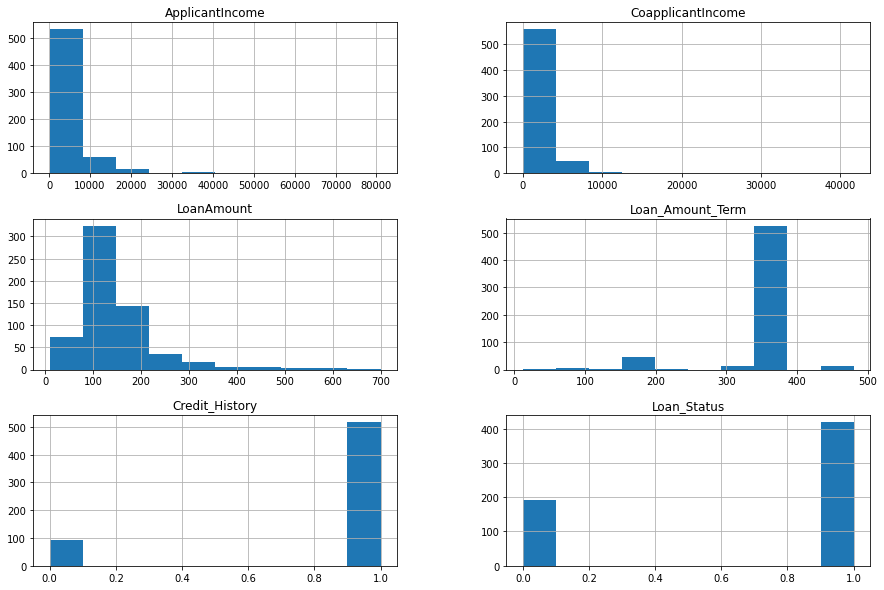

In [17]:
loan_dataset.hist(figsize=(15, 10))
plt.show()

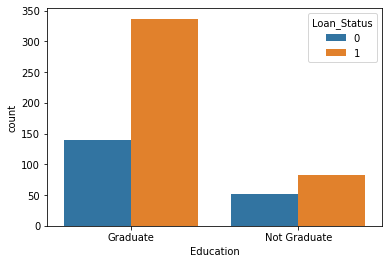

In [20]:
# education and loan status
sns.countplot(x='Education', hue = 'Loan_Status', data=loan_dataset)

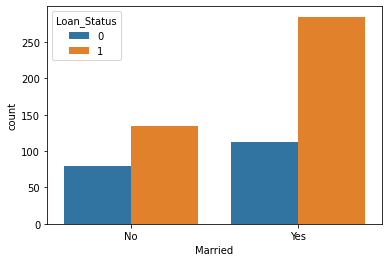

In [21]:
# marital status & Loan status
sns.countplot(x = 'Married', hue = 'Loan_Status', data=loan_dataset)

In [23]:
# convert categorical variables to numerical values
loan_dataset.replace({"Married": {"No":0,"Yes":1}, "Gender":{'Male':1,'Female':0}, 
                      'Self_Employed': {'No':0,'Yes':1}, 'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
                      'Education': {'Graduate':1,'Not Graduate':0}}, inplace = True)

In [24]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,141,360,1,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128,360,1,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66,360,1,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120,360,1,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141,360,1,2,1


In [25]:
# seperating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'], axis = 1)
Y = loan_dataset['Loan_Status']

In [26]:
print(X)
print(Y)

     Gender  Married  ... Credit_History  Property_Area
0         1        0  ...              1              2
1         1        1  ...              1              0
2         1        1  ...              1              2
3         1        1  ...              1              2
4         1        0  ...              1              2
..      ...      ...  ...            ...            ...
609       0        0  ...              1              0
610       1        1  ...              1              0
611       1        1  ...              1              2
612       1        1  ...              1              2
613       0        0  ...              0              1

[611 rows x 11 columns]
0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 611, dtype: int64


## Train Test Split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, 
                                                    stratify = Y, random_state = 22)

In [29]:
print(X.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(611, 11) (488, 11) (123, 11) (488,) (123,)


## Training the model
#### SVM Model

In [30]:
classifier = svm.SVC(kernel = 'linear')

In [31]:
#training the support vector Machine model
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Model evaluation

In [37]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [38]:
print('Accuracy on training data: ', training_data_accuracy)

Accuracy on training data:  0.8155737704918032


In [39]:
# accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [40]:
print('Accuracy on test data: ', test_data_accuracy)

Accuracy on test data:  0.8373983739837398
